In [1]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration]
import pandas as pd




In [3]:
data_ccd = pd.read_csv('scaffold_sorted_ccd.csv')
data_ccd.describe

<bound method DataFrame.describe of                                                                                                                                                                                                                                      smiles  count
0                                                                                                                                                                                                                                       NaN   2873
1                                                                                                                                                                                                                                  c1ccccc1   1546
2                                                                                                                                                                                                                                  C1CCOCC1

In [7]:
data_ccd = data_ccd.dropna()

In [8]:
smiles = 'smiles'
count = 'count'

In [9]:
PandasTools.AddMoleculeColumnToFrame(data_ccd, smilesCol='smiles')

/homes/abhik/.conda/envs/my-rdkit-env/lib/python2.7/site-packages/rdkit/Chem/PandasTools.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


In [10]:
data_ccd = data_ccd[[smiles, count, 'ROMol']]
data_ccd.describe()

count
count  8361.000000
mean      2.086951
std      18.949043
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max    1546.000000

smiles  count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
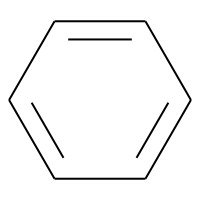
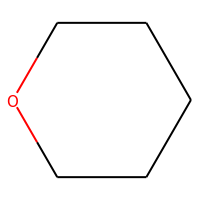
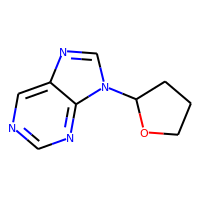
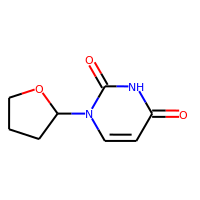
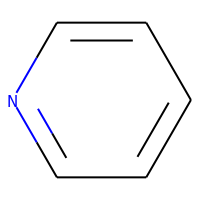
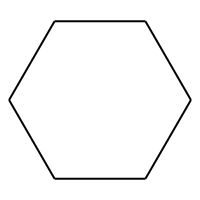
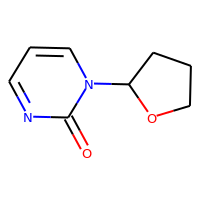
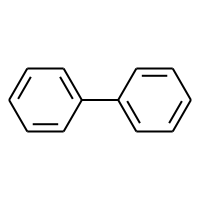
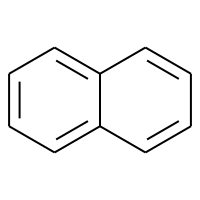
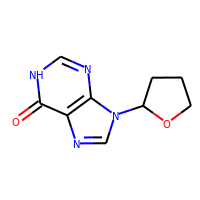
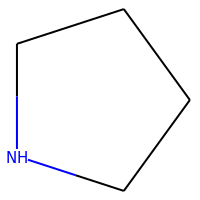
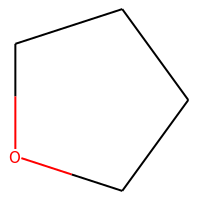
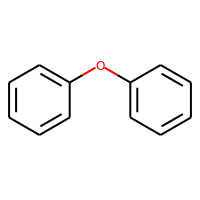
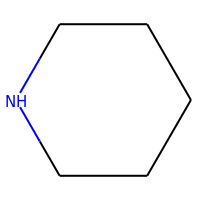
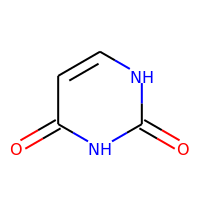
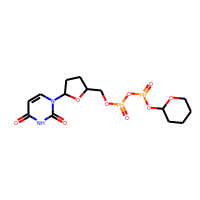
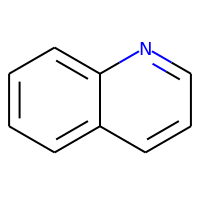
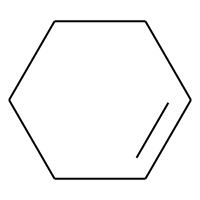
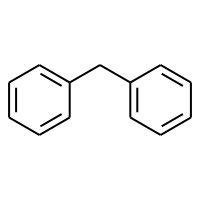
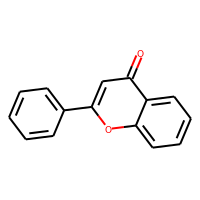
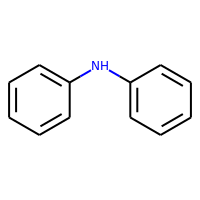
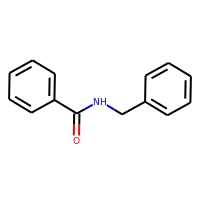
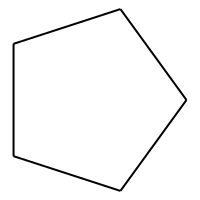
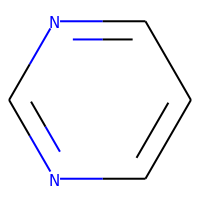

In [11]:
data_ccd.head(25)

In [12]:
data_all = pd.read_csv('scaffold_all_data_ccd.csv')

In [13]:
data_all.describe()#failed to ~2500 hetcodes, no scaffold for 2872 hetcodes #350 scaffold with 5 or more hetcodes

het    smiles
count   20321     17449
unique  20321      8361
top       6L6  c1ccccc1
freq        1      1546

In [14]:
data_all.count()


het       20321
smiles    17449
dtype: int64

In [15]:
len(data_all)

20322

In [16]:
data_dsi = pd.read_csv('scaffold_sorted_DSI.csv')


In [17]:
data_dsi.head(10)

smiles  count
0             c1ccccc1    116
1             C1CCNCC1     26
2             c1ccncc1     23
3           c1cn[nH]c1     19
4             C1COCCN1     12
5             C1CNCCN1     11
6     c1ccc2[nH]cnc2c1     10
7   c1ccc(N2CCNCC2)cc1     10
8             C1CCCCC1     10
9  c1ccc(CN2CCOCC2)cc1      9

In [18]:
data_enamine = pd.read_csv('scaffold_sorted_enamine.csv')


In [19]:
data_enamine.head(10)

smiles  count
0    c1ccccc1     80
1    c1ccncc1     34
2  c1cn[nH]c1     32
3     c1ccsc1     24
4    C1CCNCC1     20
5         NaN     16
6     c1cscn1     15
7  c1c[nH]cn1     13
8    C1COCCN1     10
9     c1ccoc1     10

In [20]:
from functools import reduce
import numpy as np

In [21]:
len(reduce(np.intersect1d, [data_dsi.smiles, data_enamine.smiles, data_all.smiles]))# number of scaffolds in common in three data set

53

In [22]:
reduce(np.intersect1d, [data_dsi.smiles, data_enamine.smiles, data_all.smiles])# number of scaffolds in common in three data set

array(['C1CC1', 'C1CCCC1', 'C1CCCCC1', 'C1CCCCCC1', 'C1CCNC1', 'C1CCNCC1',
       'C1CCOCC1', 'C1CNC1', 'C1CNCCN1', 'C1COCCN1', 'O=C(Nc1ccccc1)C1CC1',
       'O=C(Nc1ccccc1)N1CCCC1', 'O=C(Nc1ccccc1)Nc1ccccc1',
       'O=C(Nc1ccccc1)c1ccccc1', 'O=C(c1ccccc1)N1CCCCC1',
       'O=C(c1ccccc1)N1CCNCC1', 'O=C1CC=NN1c1ccccc1', 'O=C1CCCN1c1ccccc1',
       'O=S(=O)(c1ccccc1)N1CCCC1', 'c1c[nH]cn1', 'c1ccc(-c2ccccc2)cc1',
       'c1ccc(-c2ccon2)cc1', 'c1ccc(-c2cn[nH]c2)cc1', 'c1ccc(-c2cscn2)cc1',
       'c1ccc(-c2ncon2)cc1', 'c1ccc(-c2nnco2)cc1', 'c1ccc(-n2cccn2)cc1',
       'c1ccc(-n2ccnn2)cc1', 'c1ccc(C2CCNCC2)cc1', 'c1ccc(Cc2ccccc2)cc1',
       'c1ccc(N2CCNCC2)cc1', 'c1ccc2[nH]ccc2c1', 'c1ccc2[nH]cnc2c1',
       'c1ccc2c(c1)CCCN2', 'c1ccc2c(c1)CCN2', 'c1ccc2c(c1)NCCO2',
       'c1ccc2c(c1)OCCO2', 'c1ccc2c(c1)OCO2', 'c1ccc2ccccc2c1',
       'c1ccc2ncccc2c1', 'c1ccc2occc2c1', 'c1ccc2scnc2c1', 'c1ccccc1',
       'c1ccncc1', 'c1ccoc1', 'c1ccsc1', 'c1cn2c(n1)CCCC2', 'c1cn[nH]c1',
       'c1cncnc1',

In [23]:
data_pfam = pd.read_csv('pdb_het_pfam.csv')
data_pfam.describe()

ENTRY_ID CHEM_COMP_ID ACCESSION
count   1297853      1273584   1297853
unique    93983        22916      6464
top        6ek0           MG   PF00227
freq       3780       103988     21103

In [24]:
data_pfam.head()

ENTRY_ID CHEM_COMP_ID ACCESSION
0     101m          NBN   PF00042
1     101m          HEM   PF00042
2     101m          SO4   PF00042
3     102l          BME   PF00959
4     102l           CL   PF00959

In [25]:
data_pfam.describe()

ENTRY_ID CHEM_COMP_ID ACCESSION
count   1297853      1273584   1297853
unique    93983        22916      6464
top        6ek0           MG   PF00227
freq       3780       103988     21103

In [28]:
data_pfam_unique = data_pfam.drop_duplicates()

In [29]:
my_cols = ['entry', 'het', 'pfam']
data_pfam_unique.columns = my_cols
data_pfam_unique.describe()


entry     het     pfam
count   653006  639771   653006
unique   93983   22916     6464
top       6ek0      MG  PF00069
freq      3276   51585     6988

In [30]:
data_scaffold_ccd_pfam = data_all.merge(data_pfam_unique, on='het', how='left')

In [31]:
data_scaffold_ccd_pfam.head(10)

het                    smiles entry     pfam
0  AZA  c1ccc(-c2ccnc3ncnn23)cc1  1j2g  PF01014
1  AZA  c1ccc(-c2ccnc3ncnn23)cc1  1r51  PF01014
2  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2fub  PF01014
3  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2h0f  PF00576
4  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2iba  PF01014
5  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2ic0  PF01014
6  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2icq  PF01014
7  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2yzd  PF01014
8  AZA  c1ccc(-c2ccnc3ncnn23)cc1  2pes  PF01014
9  AZA  c1ccc(-c2ccnc3ncnn23)cc1  3bk8  PF01014

In [32]:
data_scaffold_ccd_pfam.describe()

het    smiles   entry     pfam
count   463004    415676  473508   473508
unique   20321      8361   85989     6203
top        SO4  c1ccccc1    5j91  PF00069
freq     22002     48886    1537     5656

In [33]:
data_scaffold_ccd_pfam.to_csv('scaffold_ccd_pfam.csv', index=False)


In [34]:
data_scaffold_ccd_pfam_no_entry = data_scaffold_ccd_pfam.drop(['het', 'entry'], axis=1)

In [35]:
data_scaffold_ccd_pfam_no_entry.head()

smiles     pfam
0  c1ccc(-c2ccnc3ncnn23)cc1  PF01014
1  c1ccc(-c2ccnc3ncnn23)cc1  PF01014
2  c1ccc(-c2ccnc3ncnn23)cc1  PF01014
3  c1ccc(-c2ccnc3ncnn23)cc1  PF00576
4  c1ccc(-c2ccnc3ncnn23)cc1  PF01014

In [36]:
data_scaffold_ccd_pfam_no_entry.groupby(['pfam']).size()

pfam
PF00001     371
PF00002       3
PF00003       4
PF00004     222
PF00005     355
PF00006     250
PF00007      16
PF00008     835
PF00009     999
PF00010      10
PF00011      11
PF00012      12
PF00013      34
PF00014     213
PF00015       2
PF00016     189
PF00017     580
PF00018     366
PF00019      78
PF00020      79
PF00021      34
PF00022     535
PF00023      33
PF00024      60
PF00025      78
PF00026    1496
PF00027     244
PF00028     269
PF00029       1
PF00030      23
PF00031      36
PF00032     500
PF00033     500
PF00034     486
PF00035      21
PF00036     290
PF00037     141
PF00039      29
PF00040      36
PF00041     162
PF00042    2238
PF00043     265
PF00044     131
PF00045      75
PF00046      24
PF00047     107
PF00048     138
PF00049      12
PF00050      41
PF00051     141
PF00053      49
PF00054      65
PF00055      46
PF00056     337
PF00057      72
PF00058      42
PF00059     570
PF00060      43
PF00061     704
PF00062    1346
PF00063     198
PF00064     222
PF0

In [37]:
data_scaffold_ccd_pfam_no_entry.groupby(['smiles']).size()

smiles
B1C=CC=CN1                                                                                                                                                                                                                                   5
B1NN=Cc2ccccc21                                                                                                                                                                                                                              3
B1NN=Cc2ccsc21                                                                                                                                                                                                                               1
B1NN=Cc2sccc21                                                                                                                                                                                                                               2
B1OC(CCNc2cc3oc(-c4ccccc4)cc3cc2C2CC2

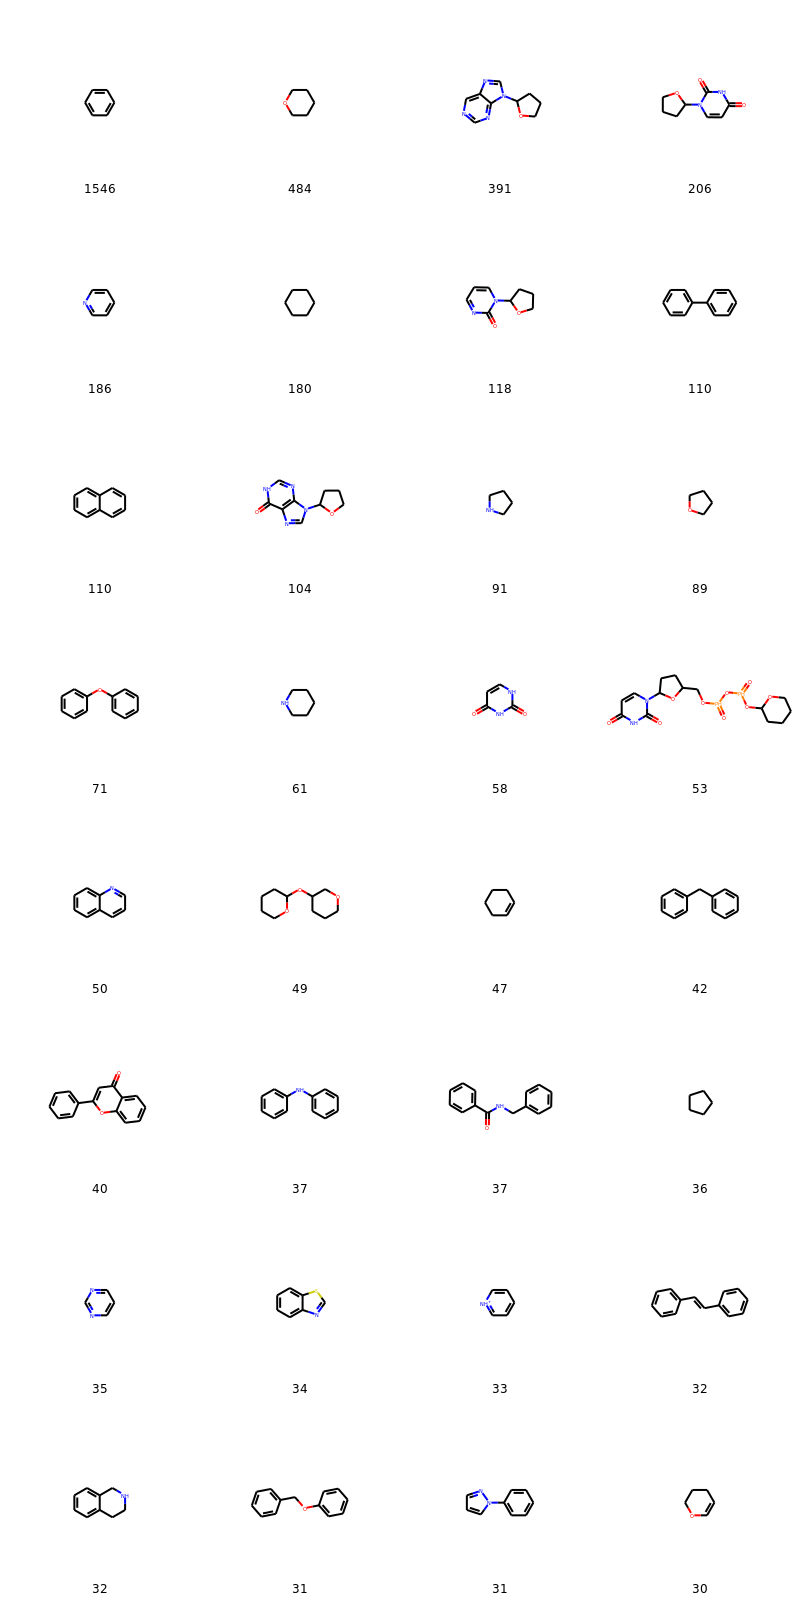

In [41]:
top_30_scaffold = ('c1ccccc1',
'C1CCOCC1',
'c1ncc2ncn(C3CCCO3)c2n1',
'O=c1ccn(C2CCCO2)c(=O)[nH]1',
'c1ccncc1',
'C1CCCCC1',
'O=c1ncccn1C1CCCO1',
'c1ccc(-c2ccccc2)cc1',
'c1ccc2ccccc2c1',
'O=c1[nH]cnc2c1ncn2C1CCCO1',
'C1CCNC1',
'C1CCOC1',
'c1ccc(Oc2ccccc2)cc1',
'C1CCNCC1',
'O=c1cc[nH]c(=O)[nH]1',
'O=c1ccn(C2CCC(CO[PH](=O)O[PH](=O)OC3CCCCO3)O2)c(=O)[nH]1',
'c1ccc2ncccc2c1',
'C1CCC(OC2CCCOC2)OC1',
'C1=CCCCC1',
'c1ccc(Cc2ccccc2)cc1',
'O=c1cc(-c2ccccc2)oc2ccccc12',
'c1ccc(Nc2ccccc2)cc1',
'O=C(NCc1ccccc1)c1ccccc1',
'C1CCCC1',
'c1cncnc1',
'c1ccc2scnc2c1',
'c1cc[nH+]cc1',
'C(=Cc1ccccc1)c1ccccc1',
'c1ccc2c(c1)CCNC2',
'c1ccc(COc2ccccc2)cc1',
'c1ccc(-n2cccn2)cc1',
'C1=COCCC1')

top_30_count = [1546,
484,
391,
206,
186,
180,
118,
110,
110,
104,
91,
89,
71,
61,
58,
53,
50,
49,
47,
42,
40,
37,
37,
36,
35,
34,
33,
32,
32,
31,
31,
30]
top_30_str = list(map(lambda l: str(l), top_30_count))
top_30 = [Chem.MolFromSmiles(x) for x in top_30_scaffold]
Draw.MolsToGridImage(top_30, molsPerRow=4, subImgSize=(200,200), legends = top_30_str)

In [32]:
top_30_image = Draw.MolsToGridImage(top_30, molsPerRow=4, subImgSize=(200,200), legends = top_30_str)

In [33]:
top_30_image.save('top_30_scaffold.png')

next get the common smiles between top 30 pdb scaffolds and top 30 drug like scaffold 

In [42]:
top_30_drug_like_scaffold = top_30 = ['c1ccccc1',
'c1ncc2ncn(C3CCCO3)c2n1',
'C1CCOCC1',
'c1ccncc1',
'O=c1ccn(C2CCCO2)c(=O)[nH]1',
'c1ccc(-c2ccccc2)cc1',
'c1ccc2ccccc2c1',
'C1CCCCC1',
'c1ccc(Oc2ccccc2)cc1',
'C1CCNC1',
'O=c1cc(-c2ccccc2)oc2ccccc12',
'O=c1ncccn1C1CCCO1',
'c1ccc2ncccc2c1',
'O=c1cc[nH]c(=O)[nH]1',
'C1=CCCCC1',
'O=c1[nH]cnc2c1ncn2C1CCCO1',
'C1CCNCC1',
'c1ccc2scnc2c1',
'c1ccc(Nc2ccccc2)cc1',
'c1ccc(Cc2ccccc2)cc1',
'C1CCOC1',
'O=c1ccc2ccccc2o1',
'C1CCCC1',
'O=C(NCc1ccccc1)c1ccccc1',
'O=C1c2ccccc2C(=O)c2ccccc21',
'c1ccc2c(c1)CCNC2',
'c1ccc(COc2ccccc2)cc1',
'C1CCC(OC2CCCOC2)OC1']

In [52]:
df_ccd_top_30 = pd.DataFrame(top_30)

In [53]:
df_drug_like = pd.DataFrame(top_30_drug_like_scaffold)

In [54]:
frames = [df_ccd_top_30, df_drug_like]

In [55]:
result = pd.concat(frames)

In [58]:
result = result.drop_duplicates()

In [59]:
result

0
0                      c1ccccc1
1        c1ncc2ncn(C3CCCO3)c2n1
2                      C1CCOCC1
3                      c1ccncc1
4    O=c1ccn(C2CCCO2)c(=O)[nH]1
5           c1ccc(-c2ccccc2)cc1
6                c1ccc2ccccc2c1
7                      C1CCCCC1
8           c1ccc(Oc2ccccc2)cc1
9                       C1CCNC1
10  O=c1cc(-c2ccccc2)oc2ccccc12
11            O=c1ncccn1C1CCCO1
12               c1ccc2ncccc2c1
13         O=c1cc[nH]c(=O)[nH]1
14                    C1=CCCCC1
15    O=c1[nH]cnc2c1ncn2C1CCCO1
16                     C1CCNCC1
17                c1ccc2scnc2c1
18          c1ccc(Nc2ccccc2)cc1
19          c1ccc(Cc2ccccc2)cc1
20                      C1CCOC1
21             O=c1ccc2ccccc2o1
22                      C1CCCC1
23      O=C(NCc1ccccc1)c1ccccc1
24   O=C1c2ccccc2C(=O)c2ccccc21
25             c1ccc2c(c1)CCNC2
26         c1ccc(COc2ccccc2)cc1
27          C1CCC(OC2CCCOC2)OC1

In [63]:
my_col = ['smi']
result.columns = my_col
unique_ccd_drug_like_scaffold_list = result['smi'].tolist()

In [64]:
unique_ccd_drug_like_scaffold_list

['c1ccccc1',
 'c1ncc2ncn(C3CCCO3)c2n1',
 'C1CCOCC1',
 'c1ccncc1',
 'O=c1ccn(C2CCCO2)c(=O)[nH]1',
 'c1ccc(-c2ccccc2)cc1',
 'c1ccc2ccccc2c1',
 'C1CCCCC1',
 'c1ccc(Oc2ccccc2)cc1',
 'C1CCNC1',
 'O=c1cc(-c2ccccc2)oc2ccccc12',
 'O=c1ncccn1C1CCCO1',
 'c1ccc2ncccc2c1',
 'O=c1cc[nH]c(=O)[nH]1',
 'C1=CCCCC1',
 'O=c1[nH]cnc2c1ncn2C1CCCO1',
 'C1CCNCC1',
 'c1ccc2scnc2c1',
 'c1ccc(Nc2ccccc2)cc1',
 'c1ccc(Cc2ccccc2)cc1',
 'C1CCOC1',
 'O=c1ccc2ccccc2o1',
 'C1CCCC1',
 'O=C(NCc1ccccc1)c1ccccc1',
 'O=C1c2ccccc2C(=O)c2ccccc21',
 'c1ccc2c(c1)CCNC2',
 'c1ccc(COc2ccccc2)cc1',
 'C1CCC(OC2CCCOC2)OC1']

In [72]:

unique_smi_mol = [Chem.MolFromSmiles(x) for x in unique_ccd_drug_like_scaffold_list]
unique_ccd_drug_like_scaffold_list_image = Draw.MolsToGridImage(unique_smi_mol, molsPerRow=4, subImgSize=(200,200))

In [73]:
unique_ccd_drug_like_scaffold_list_image.save('drug_like_scaffold.png')

In [3]:
common_53_smiles = ['C1CC1', 'C1CCCC1', 'C1CCCCC1', 'C1CCCCCC1', 'C1CCNC1', 'C1CCNCC1',
       'C1CCOCC1', 'C1CNC1', 'C1CNCCN1', 'C1COCCN1', 'O=C(Nc1ccccc1)C1CC1',
       'O=C(Nc1ccccc1)N1CCCC1', 'O=C(Nc1ccccc1)Nc1ccccc1',
       'O=C(Nc1ccccc1)c1ccccc1', 'O=C(c1ccccc1)N1CCCCC1',
       'O=C(c1ccccc1)N1CCNCC1', 'O=C1CC=NN1c1ccccc1', 'O=C1CCCN1c1ccccc1',
       'O=S(=O)(c1ccccc1)N1CCCC1', 'c1c[nH]cn1', 'c1ccc(-c2ccccc2)cc1',
       'c1ccc(-c2ccon2)cc1', 'c1ccc(-c2cn[nH]c2)cc1', 'c1ccc(-c2cscn2)cc1',
       'c1ccc(-c2ncon2)cc1', 'c1ccc(-c2nnco2)cc1', 'c1ccc(-n2cccn2)cc1',
       'c1ccc(-n2ccnn2)cc1', 'c1ccc(C2CCNCC2)cc1', 'c1ccc(Cc2ccccc2)cc1',
       'c1ccc(N2CCNCC2)cc1', 'c1ccc2[nH]ccc2c1', 'c1ccc2[nH]cnc2c1',
       'c1ccc2c(c1)CCCN2', 'c1ccc2c(c1)CCN2', 'c1ccc2c(c1)NCCO2',
       'c1ccc2c(c1)OCCO2', 'c1ccc2c(c1)OCO2', 'c1ccc2ccccc2c1',
       'c1ccc2ncccc2c1', 'c1ccc2occc2c1', 'c1ccc2scnc2c1', 'c1ccccc1',
       'c1ccncc1', 'c1ccoc1', 'c1ccsc1', 'c1cn2c(n1)CCCC2', 'c1cn[nH]c1',
       'c1cncnc1', 'c1cnoc1', 'c1cscn1', 'c1nc[nH]n1', 'c1nncs1']

In [4]:
common_53_mol = [Chem.MolFromSmiles(x) for x in common_53_smiles]

In [5]:
common_53_image = Draw.MolsToGridImage(common_53_mol, molsPerRow=5, subImgSize=(200,200))

/homes/abhik/.conda/envs/my-rdkit-env/lib/python2.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:171: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


In [6]:
common_53_image.save('common_53.png')